# From Scratch to Smart: CNNs and Transfer Learning for Image Classification


## Main Goals of the Project

### 1. Build a CNN from Scratch
- **Design and train** a custom Convolutional Neural Network to classify images from the **CIFAR-10 dataset**.  
- Include **convolutional, pooling, and fully connected layers**.  
- Apply best practices such as **normalization, data augmentation, and early stopping**.  

### 2. Apply Transfer Learning
- Utilize **pre-trained models** (e.g., VGG16, ResNet, Inception) trained on **ImageNet**.  
- Adapt them to CIFAR-10 through **feature extraction and/or fine-tuning**.  
- Compare which **pre-trained architecture achieves the best performance**.  

### 3. Evaluate and Compare Approaches
- Assess model performance using **accuracy, precision, recall, and F1-score**.  
- Visualize results with a **confusion matrix**.
- Directly compare your custom CNN vs. transfer learning models, analyzing advantages and trade-offs.

### 4. Critical Analysis and Insights
- Reflect on when to use models from scratch vs. transfer learning.
- Discuss trade-offs: data requirements, training time, accuracy, generalization.
   

Remember to install the necessary requirements before running this code.
            - pip install -r requirements.txt

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from keras import layers, Sequential, regularizers, models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, RandomFlip, RandomRotation, RandomZoom, Rescaling, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.models import load_model, Sequential
from keras.utils import to_categorical
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

from collections import Counter

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
save_dir = "/model_checkpoint"

In [3]:
# Loading and splitting dataset into training and testing
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

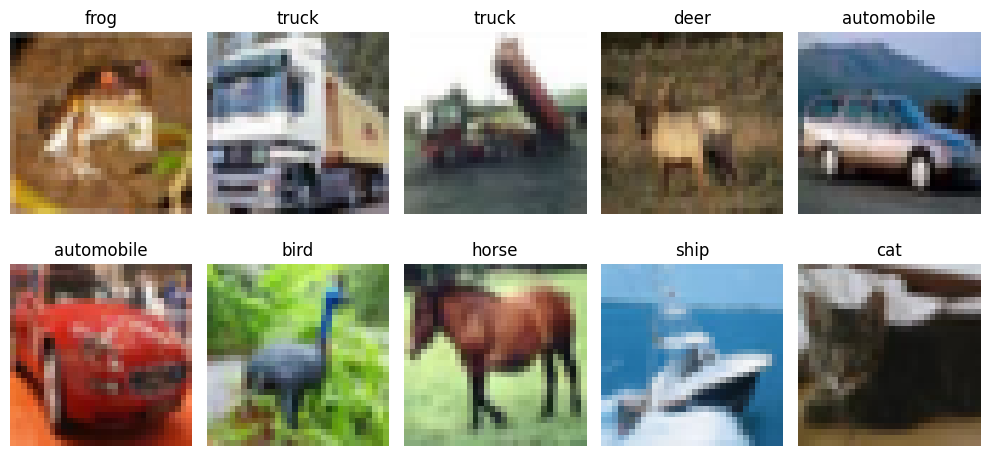

In [4]:
class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i].item()])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
y_train=y_train.reshape (-1,)

In [6]:
def plot_image(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(class_names[y[index]],fontsize=15)

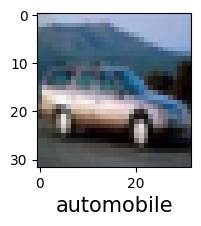

In [7]:
plot_image(X_train,y_train, 4)

In [8]:
X_train =X_train/255
X_test = X_test/255

## Building CNN

In [9]:
model1 = Sequential([
    layers.Input(shape=(32,32,3)),
    # Input shape is 32x32 pixels with 3 color channel (RGB)
    Conv2D(32, (3,3), activation='relu'),
    # Max pooling layer to reduce spatial dimensions by a factor of 2
    MaxPooling2D(2,2),
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Another max pooling layer to reduce size further
    MaxPooling2D(2,2),
    # Flatten the 2D feature maps into a 1D vector for dense layers
    Flatten(),
    # Fully connected (dense) layer with 128 neurons and ReLU activation
    #Learns intermediate features from the previous layers
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    #Produces the final probabilities for each class.
    Dense(10, activation='softmax')
    ],name="model1")

In [10]:
model1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [11]:
model1.fit(X_train,y_train , epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 1.4352 - accuracy: 0.4855
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0675 - accuracy: 0.6281
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9301 - accuracy: 0.6758
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8332 - accuracy: 0.7091
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7579 - accuracy: 0.7365
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6877 - accuracy: 0.7599
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6250 - accuracy: 0.7815
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5691 - accuracy: 0.7999
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5159 - accuracy: 0.8188
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4

In [12]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9987 - accuracy: 0.7007


[0.9987283945083618, 0.7006999850273132]

In [13]:
model1.save("cnnmodel_v1.keras")

In [14]:
y_test = y_test.reshape(-1,)

In [15]:
y_pred = model1.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
y_classes= [np.argmax(element) for  element in y_pred]

In [17]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.80      0.81      0.81      1000
           2       0.57      0.67      0.62      1000
           3       0.51      0.54      0.53      1000
           4       0.66      0.65      0.65      1000
           5       0.64      0.55      0.59      1000
           6       0.76      0.78      0.77      1000
           7       0.80      0.73      0.77      1000
           8       0.79      0.80      0.80      1000
           9       0.84      0.71      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [18]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4138 - accuracy: 0.8542 - val_loss: 0.4577 - val_accuracy: 0.8378
Epoch 2/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3558 - accuracy: 0.8763 - val_loss: 0.5156 - val_accuracy: 0.8181
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3070 - accuracy: 0.8925 - val_loss: 0.5087 - val_accuracy: 0.8289
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2690 - accuracy: 0.9040 - val_loss: 0.5482 - val_accuracy: 0.8208
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2341 - accuracy: 0.9184 - val_loss: 0.6191 - val_accuracy: 0.8093
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2068 - accuracy: 0.9286 - val_loss: 0.6789 - val_accuracy: 0.7947
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1764 - accuracy: 0.9383 - val_loss: 0.7460 - val_accuracy:

In [19]:
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

Test accuracy: 0.6673


In [20]:
model1.save("cnnmodel_v2.keras")

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model1.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.6673
Precision: 0.6754
Recall: 0.6673
F1 Score: 0.6690


## Confusion Matrix before applying convenient models

313/313 [==============================] - 1s 2ms/step


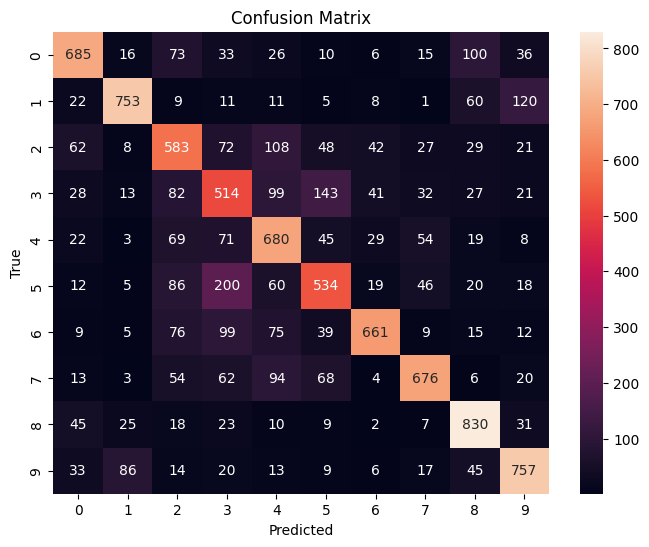

In [22]:
y_pred = model1.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Refining our model:

In [23]:

# Setup EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)
# Train the model with early stopping
history = model1.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")

Epoch 1/60
625/625 [==============================] - 4s 5ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 2.0143 - val_accuracy: 0.7442
Epoch 2/60
625/625 [==============================] - 3s 5ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 2.0036 - val_accuracy: 0.7460
Epoch 3/60
625/625 [==============================] - 3s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0353 - val_accuracy: 0.7490
Epoch 4/60
625/625 [==============================] - 4s 6ms/step - loss: 7.0042e-04 - accuracy: 1.0000 - val_loss: 2.0644 - val_accuracy: 0.7498
Epoch 5/60
313/313 [==============================] - 1s 3ms/step - loss: 3.2771 - accuracy: 0.6824
Test accuracy with early stopping: 0.6824


In [24]:
model1.save("collab_cnnmodel_esv2.keras")

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
).flow(X_tr, y_tr, batch_size=64, shuffle=True, seed=42)

val_gen = ImageDataGenerator().flow(X_val, y_val, batch_size=64, shuffle=False)

history = model1.fit(train_gen, epochs=20, validation_data=val_gen)
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

Epoch 1/20
625/625 [==============================] - 20s 32ms/step - loss: 1.4032 - accuracy: 0.5641 - val_loss: 0.7483 - val_accuracy: 0.7378
Epoch 2/20
625/625 [==============================] - 21s 34ms/step - loss: 1.0856 - accuracy: 0.6279 - val_loss: 0.7465 - val_accuracy: 0.7362
Epoch 3/20
625/625 [==============================] - 20s 32ms/step - loss: 1.0183 - accuracy: 0.6464 - val_loss: 0.7038 - val_accuracy: 0.7540
Epoch 4/20
625/625 [==============================] - 19s 30ms/step - loss: 0.9688 - accuracy: 0.6637 - val_loss: 0.6634 - val_accuracy: 0.7670
Epoch 5/20
625/625 [==============================] - 19s 31ms/step - loss: 0.9359 - accuracy: 0.6748 - val_loss: 0.6824 - val_accuracy: 0.7561
Epoch 6/20
625/625 [==============================] - 17s 27ms/step - loss: 0.9070 - accuracy: 0.6835 - val_loss: 0.6717 - val_accuracy: 0.7599
Epoch 7/20
625/625 [==============================] - 17s 28ms/step - loss: 0.8874 - accuracy: 0.6872 - val_loss: 0.6393 - val_accuracy:

In [26]:
model1.save("collab_cnnmodel_dav3.keras")

In [27]:
from tensorflow.keras import layers, models, regularizers

def make_stronger_cnn(input_shape=(32,32,3), wd=1e-4, dr=0.5):
    return models.Sequential([
        layers.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Block 2
        layers.Conv2D(64, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Block 3
        layers.Conv2D(128, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Classifier
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        layers.Dropout(dr),
        layers.Dense(10, activation='softmax'),
    ])

In [28]:
# 1. Create model
model2 = make_stronger_cnn(input_shape=(32,32,3), wd=1e-4, dr=0.5)

# 2. Compile
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train
history = model2.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

# 4. Evaluate
loss, acc = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

Epoch 1/30
625/625 [==============================] - 9s 12ms/step - loss: 1.8154 - accuracy: 0.3723 - val_loss: 1.4074 - val_accuracy: 0.5252
Epoch 2/30
625/625 [==============================] - 7s 11ms/step - loss: 1.3769 - accuracy: 0.5390 - val_loss: 1.1748 - val_accuracy: 0.6177
Epoch 3/30
625/625 [==============================] - 7s 11ms/step - loss: 1.1726 - accuracy: 0.6262 - val_loss: 1.1264 - val_accuracy: 0.6463
Epoch 4/30
625/625 [==============================] - 8s 12ms/step - loss: 1.0549 - accuracy: 0.6720 - val_loss: 0.8847 - val_accuracy: 0.7340
Epoch 5/30
625/625 [==============================] - 7s 11ms/step - loss: 0.9608 - accuracy: 0.7103 - val_loss: 0.8847 - val_accuracy: 0.7430
Epoch 6/30
625/625 [==============================] - 7s 11ms/step - loss: 0.9220 - accuracy: 0.7285 - val_loss: 0.8664 - val_accuracy: 0.7488
Epoch 7/30
625/625 [==============================] - 7s 11ms/step - loss: 0.8816 - accuracy: 0.7527 - val_loss: 0.9079 - val_accuracy: 0.7483

In [29]:
model2.save("colab_cnn_finalv4.keras")

313/313 [==============================] - 1s 3ms/step


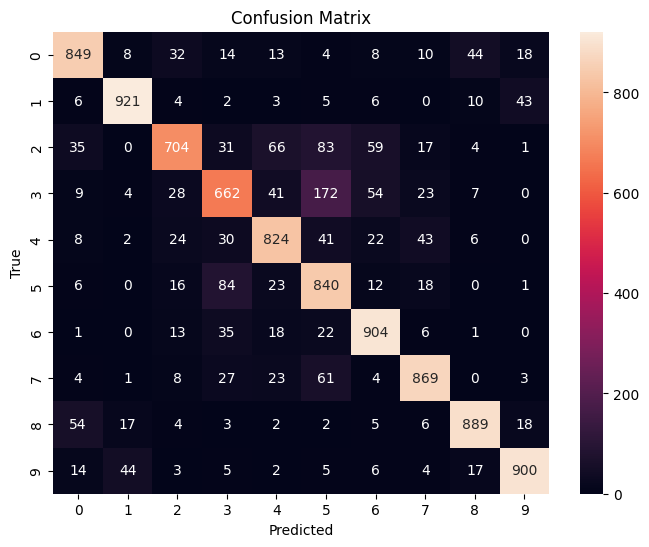

In [30]:
y_pred = model2.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
